In [3]:
import pandas as pd
import numpy as np
import random
import sklearn.cluster as cluster
from sklearn.metrics import silhouette_samples, silhouette_score, confusion_matrix
import sklearn.preprocessing
from sklearn.cluster import Birch, KMeans, AgglomerativeClustering, MiniBatchKMeans
import matplotlib.pyplot as plt
import matplotlib.cm as cm
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning) 

In [4]:
number_clusters = 2
stamp = 'genre'

### Pregunta 1

In [5]:
movies = pd.read_csv('movies.csv', encoding = "ISO-8859-1")
temp = movies
columns = list(movies.describe().columns[1:])
columns.extend(['actorsPopularity', 'castWomenAmount', 'castMenAmount', 'popular'])
popular = []
genres = []
graph_labels = []
for index, row in temp.iterrows():
  try:

    data = row['actorsPopularity'].split('|')
    value = np.sort(np.array(data).astype(float))[-1]

    # Aqui se observa si los datos tienen sentido
    if (
      row['budget'] >= 300000000 or 
      row['revenue'] >= 1200000000 or
      row['runtime'] >= 300 or
      row['popularity'] >= 900 or
      row['voteCount'] >= 20000 or
      row['genresAmount'] >= 10 or
      row['productionCoAmount'] >= 25 or
      row['productionCountriesAmount'] >= 20 or
      row['actorsAmount'] >= 200 or
      int(row['castWomenAmount']) >= 55 or
      int(row['castMenAmount']) >= 100
    ):
      temp = temp.drop(index=index)
      continue
    genres.append(row['genres'].split('|')[0])
    popular.append(value)
  except:
    temp = temp.drop(index=index)
temp['popular'] = popular
temp['genre'] = genres
temp = temp.astype({'castWomenAmount': int, 'castMenAmount': int}).drop(columns=['genres', 'actorsPopularity'])
columns.remove('actorsPopularity')
columns.remove('budget')
columns.remove('runtime')
variables = temp[columns]

# Aqui se hacen los grupos
data = np.array(temp[columns])
tags_list = list(np.array(temp[[stamp]]))

normalized_variables = (variables-variables.min())/(variables.max()-variables.min())

graph_labels = [columns[0], columns[1]]

In [6]:
aux = temp.groupby(by=stamp)
tag_group = list(aux.groups.keys())
tags = []
tag_to_number = {}
number_to_taga = {}

for i in range(len(tag_group)): 
  tag_to_number[tag_group[i]] = i
  number_to_taga[i] = tag_group[i]

for i in range(len(tags_list)):
  tags.append(tag_to_number[tags_list[i][0]])


### Pregunta 2

In [7]:
random.seed(123)
X_scale=sklearn.preprocessing.scale(variables)

pyclustertend.hopkins(X_scale, len(X_scale))

NameError: name 'pyclustertend' is not defined

El valor de hopkins es de 0.085, por lo que vale la pena hacer el agrupamiento.

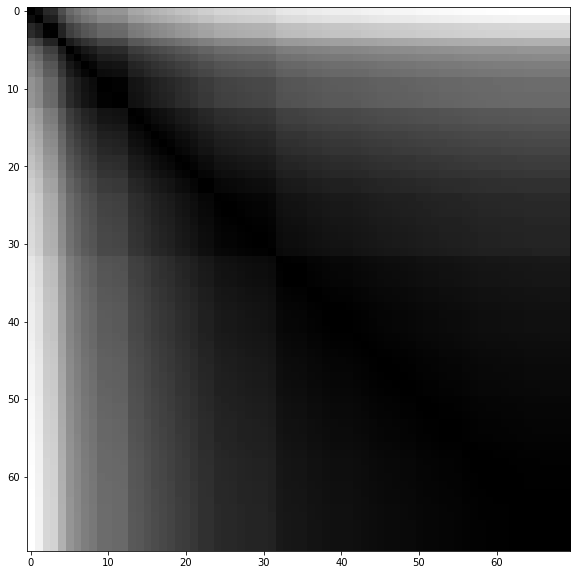

In [ ]:
pyclustertend.vat(variables[:70])

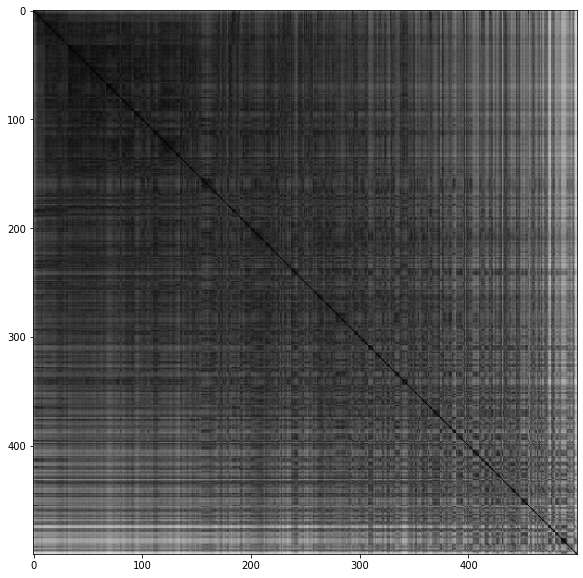

In [ ]:
pyclustertend.vat(X_scale[:500])

### Pregunta 3

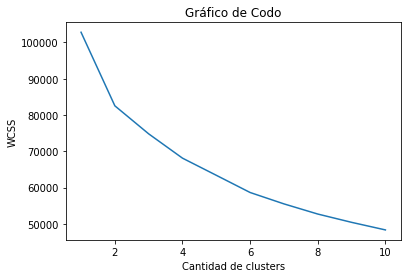

In [ ]:
numeroClusters = range(1,11)

wcss = []
# Obtenemos 10 posibles clusters
for i in numeroClusters:
    # Se calcula la kmean con esa cantidad de clusters
    kmeans = cluster.KMeans(n_clusters=i)
    kmeans.fit(X_scale)
    # Obtenemos la inercia
    wcss.append(kmeans.inertia_)

# Graficando
plt.plot(numeroClusters, wcss)
plt.xlabel("Cantidad de clusters")
plt.ylabel("WCSS")
plt.title("Gráfico de Codo")
plt.show()

### Pregunta 4 - Metodo de K-Medias

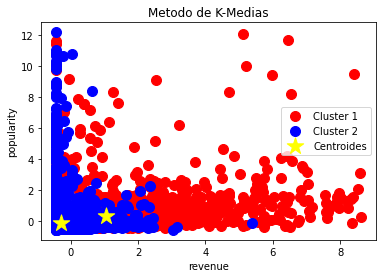

In [ ]:
kmeans_cluster = KMeans(n_clusters=number_clusters)
kmeans_cluster.fit(X_scale)
kmeans_result = kmeans_cluster.predict(X_scale)
print(kmeans_result, 'quii')

# Plot
plt.scatter(X_scale[kmeans_result == 0, 0], X_scale[kmeans_result == 0, 1], s = 100, c = 'red', label = "Cluster 1")
plt.scatter(X_scale[kmeans_result == 1, 0], X_scale[kmeans_result == 1, 1], s = 100, c = 'blue', label = "Cluster 2")
if number_clusters == 3: plt.scatter(X_scale[kmeans_result == 2, 0], X_scale[kmeans_result == 2, 1], s = 100, c = 'lime', label = "Cluster 3")
plt.scatter(kmeans_cluster.cluster_centers_[:,0], kmeans_cluster.cluster_centers_[:,1], s=300, c="yellow",marker="*", label="Centroides")
plt.title("Metodo de K-Medias")

plt.xlabel(graph_labels[0])
plt.ylabel(graph_labels[1])
plt.legend()
plt.show()

### Pregunta 4 - Metodo de BIRCH
Referencia de: https://www.freecodecamp.org/espanol/news/8-algoritmos-de-agrupacion-en-clusteres-en-el-aprendizaje-automatico-que-todos-los-cientificos-de-datos-deben-conocer/

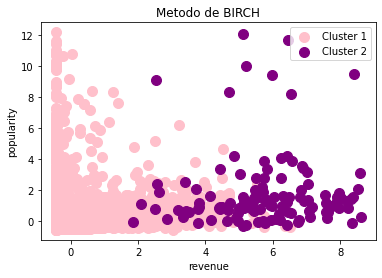

In [ ]:
# Inicializar el modelo
birch_model = Birch(threshold=1.5, n_clusters=number_clusters)
birch_model.fit(X_scale)

# Obtenemos los puntos y los clusters
birch_result = birch_model.predict(X_scale)

# Graficar los clusters
plt.scatter(X_scale[birch_result == 0, 0], X_scale[birch_result == 0, 1], s = 100, c = 'pink', label = "Cluster 1")
plt.scatter(X_scale[birch_result == 1, 0], X_scale[birch_result == 1, 1], s = 100, c = 'purple', label = "Cluster 2")
if number_clusters == 3: plt.scatter(X_scale[birch_result == 2, 0], X_scale[birch_result == 2, 1], s = 100, c = 'skyblue', label = "Cluster 3")
plt.title("Metodo de BIRCH")
plt.xlabel(graph_labels[0])
plt.ylabel(graph_labels[1])
plt.legend()
plt.show()

### Pregunta 4 - Metodo de Agrupación Jerárquica  Aglomerativa

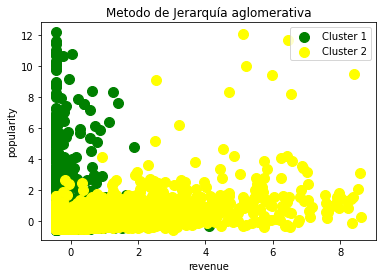

In [ ]:
# Creación modelo y asignación de clusters = 2
agglomerative_model  = AgglomerativeClustering(n_clusters=number_clusters)
agglomerative_result = agglomerative_model.fit_predict(X_scale)

# Plotting
plt.scatter(X_scale[agglomerative_result == 0, 0], X_scale[agglomerative_result == 0, 1], s = 100, c = 'green', label = "Cluster 1")
plt.scatter(X_scale[agglomerative_result == 1, 0], X_scale[agglomerative_result == 1, 1], s = 100, c = 'yellow', label = "Cluster 2")
if number_clusters == 3: plt.scatter(X_scale[agglomerative_result == 2, 0], X_scale[agglomerative_result == 2, 1], s = 100, c = 'red', label = "Cluster 3")

# Set de gráfico
plt.title("Metodo de Jerarquía aglomerativa")
plt.xlabel(graph_labels[0])
plt.ylabel(graph_labels[1])
plt.legend()
plt.show()

#Ref: https://scikit-learn.org/

### Pregunta 4 - Metodo de MiniBatch

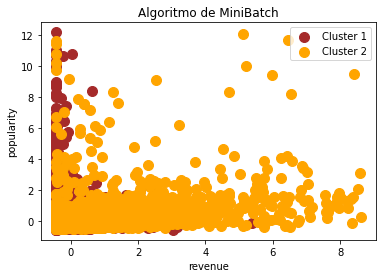

In [ ]:
# Creación modelo y asignación de clusters = 2
minibatch_model = MiniBatchKMeans(n_clusters=number_clusters, batch_size=3072)
minibatch_result   = minibatch_model.fit_predict(X_scale)

# Plotting
plt.scatter(X_scale[minibatch_result == 0, 0], X_scale[minibatch_result == 0, 1], s = 100, c = 'brown', label = "Cluster 1")
plt.scatter(X_scale[minibatch_result == 1, 0], X_scale[minibatch_result == 1, 1], s = 100, c = 'orange', label = "Cluster 2")
if number_clusters == 3: plt.scatter(X_scale[minibatch_result == 2, 0], X_scale[minibatch_result == 2, 1], s = 100, c = 'blue', label = "Cluster 3")

# Set de gráfico
plt.title("Algoritmo de MiniBatch")
plt.xlabel(graph_labels[0])
plt.ylabel(graph_labels[1])
plt.legend()
plt.show()

#Ref: https://scikit-learn.org/

### Pregunta 5

For n_clusters = 2 The average silhouette_score of K-Means is: 0.3259566423543145
For n_clusters = 2 The average silhouette_score of BIRCH is: 0.5730482477227066
For n_clusters = 2 The average silhouette_score of Jerarquía Aglomerativa is: 0.2665569890519644
For n_clusters = 2 The average silhouette_score of MiniBatch is: 0.3652991561171076


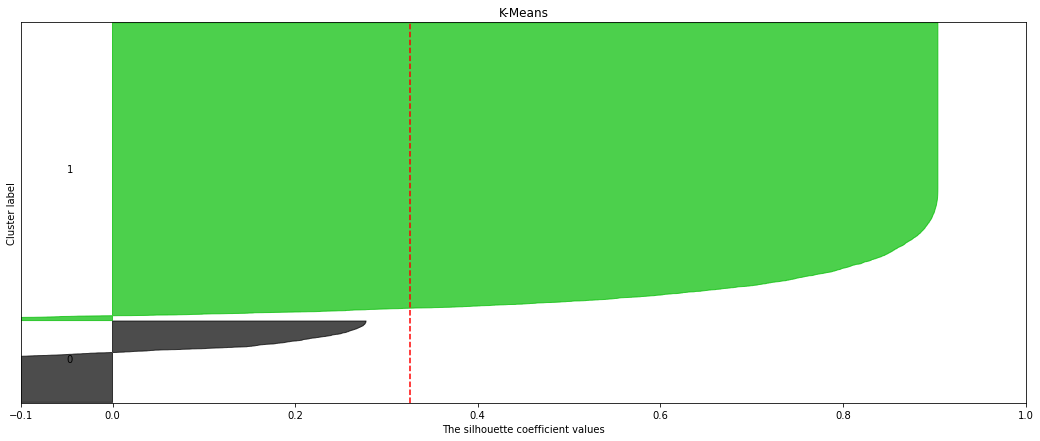

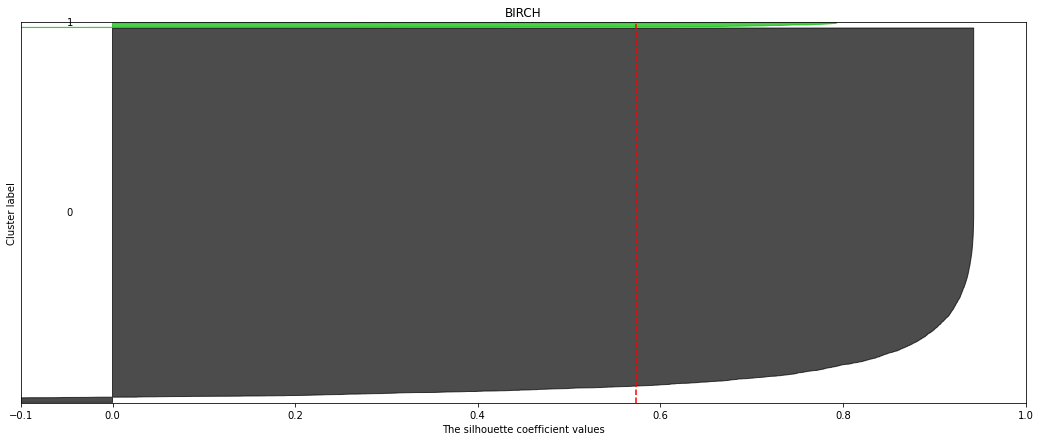

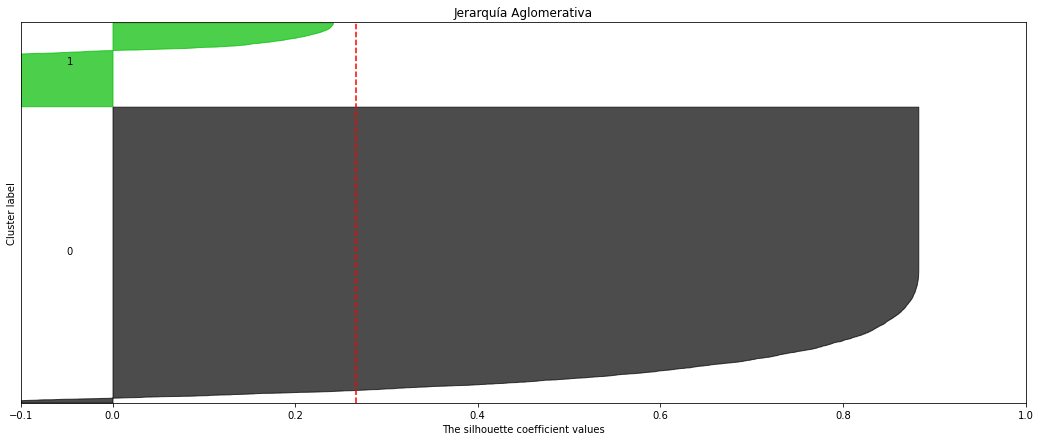

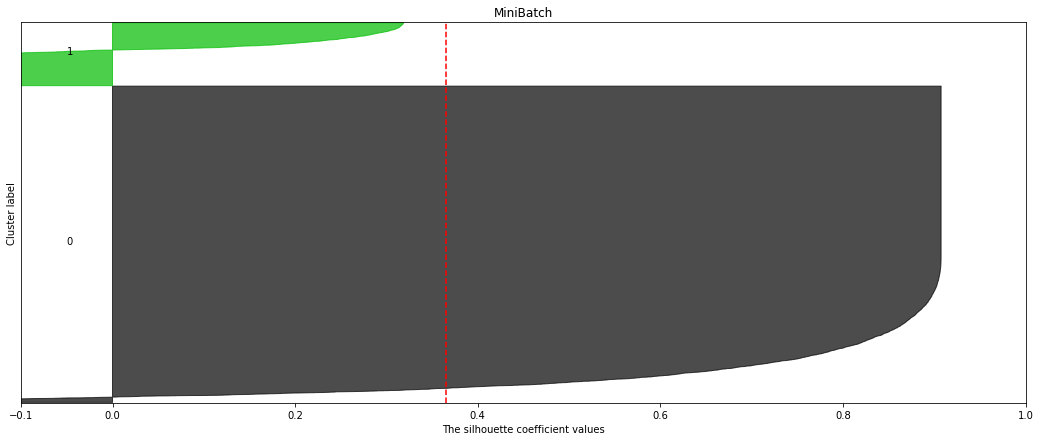

In [ ]:
def make_silhouette(clusterer, n_clusters, label):
    fig, ax = plt.subplots(figsize=(1,1))
    fig.set_size_inches(18, 7)

    ax.set_xlim([-0.1, 1])
    ax.set_ylim([0, len(X_scale) + (n_clusters + 1) * 10])

    cluster_labels = clusterer.fit_predict(X_scale)

    silhouette_avg = silhouette_score(X_scale, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score of",
        label,
        'is:',
        silhouette_avg,
    )

    sample_silhouette_values = silhouette_samples(variables, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # 10 for the 0 samples

    ax.set_title(label)
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    ax.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax.set_yticks([]) 
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

make_silhouette(kmeans_cluster, number_clusters, 'K-Means')
make_silhouette(birch_model, number_clusters, 'BIRCH')
make_silhouette(agglomerative_model, number_clusters, 'Jerarquía Aglomerativa')
make_silhouette(minibatch_model, number_clusters, 'MiniBatch')
plt.show()

### Pregunta 6

In [ ]:
# Se realiza el analisis de los grupos
confusion_kmeans = confusion_matrix(kmeans_result, tags)[0:number_clusters]
confusion_birch = confusion_matrix(birch_result, tags)[0:number_clusters]
confusion_agglomerative = confusion_matrix(agglomerative_result, tags)[0:number_clusters]
confusion_minibatch = confusion_matrix(minibatch_result, tags)[0:number_clusters]

# Se observar como es que estan por categoria
def get_category(confusion_array, label=''):
  print('\nCONFUSION DE:', label)
  keys = list(tag_to_number.keys())
  for i in range(number_clusters):
    print('\nCLUSTER #', i+1)
    result = list(confusion_array[i])
    index = result.index(max(result))
    for j in range(len(keys)):
      print('--> %d pertenece a %s' %(result[j], keys[j]))
    print('Podemos asegurar que es el grupo de: %s con %d' %(keys[index], result[index]))

get_category(confusion_kmeans, 'K-MEANS')
get_category(confusion_birch, 'BIRCH')
get_category(confusion_agglomerative, 'AGGLOMERATIVE')
get_category(confusion_minibatch, 'MINIBATCH')


CONFUSION DE: K-MEANS

CLUSTER # 1
--> 396 pertenece a Action
--> 168 pertenece a Adventure
--> 84 pertenece a Animation
--> 367 pertenece a Comedy
--> 99 pertenece a Crime
--> 7 pertenece a Documentary
--> 367 pertenece a Drama
--> 53 pertenece a Family
--> 68 pertenece a Fantasy
--> 8 pertenece a History
--> 77 pertenece a Horror
--> 12 pertenece a Music
--> 18 pertenece a Mystery
--> 49 pertenece a Romance
--> 80 pertenece a Science Fiction
--> 1 pertenece a TV Movie
--> 94 pertenece a Thriller
--> 18 pertenece a War
--> 11 pertenece a Western
Podemos asegurar que es el grupo de: Action con 396

CLUSTER # 2
--> 1044 pertenece a Action
--> 353 pertenece a Adventure
--> 656 pertenece a Animation
--> 1074 pertenece a Comedy
--> 268 pertenece a Crime
--> 174 pertenece a Documentary
--> 1360 pertenece a Drama
--> 294 pertenece a Family
--> 162 pertenece a Fantasy
--> 23 pertenece a History
--> 765 pertenece a Horror
--> 78 pertenece a Music
--> 83 pertenece a Mystery
--> 230 pertenece a